# Pymaceuticals Inc.
---

### Analysis

- The study is evenly distributed gender ration wise. Number of female and male mice that are being studied are almost equal is numbers.

- There are no significant outliers in the drug study skewing the results. Only drug Infubinol has one outlier.

- Drugs Capomulin and Ramicane are more effective than Infubinol, Ceftamin in reducing tumor volume as the treatment progresses.

- Study results for mouse l509 show that for drug Capomulin, the tumor volume reduces as the treatment progresses. 

- There is a strong positive correlation between mouse weight and the average tumor volume.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count = len(data_complete["Mouse ID"].unique())
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ids = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data_complete.loc[data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data = data_complete[data_complete['Mouse ID'].isin(duplicate_ids)==False]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
count_mice = len(clean_study_data["Mouse ID"].unique())
count_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drugwise_df = clean_study_data.groupby(['Drug Regimen'])
drugwise_mean = drugwise_df['Tumor Volume (mm3)'].mean()
drugwise_median = drugwise_df['Tumor Volume (mm3)'].median()
drugwise_var = drugwise_df['Tumor Volume (mm3)'].var()
drugwise_std = drugwise_df['Tumor Volume (mm3)'].std()
drugwise_sem = drugwise_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen = pd.DataFrame({'Mean Tumor Volume' : drugwise_mean,
                             'Median Tumor Volume' : drugwise_median,
                             'Tumor Volume Variance' : drugwise_var,
                             'Tumor Volume Std. Dev.' : drugwise_std,
                             'Tumor Volume Std. Err' : drugwise_sem})

drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg_df = clean_study_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
drug_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

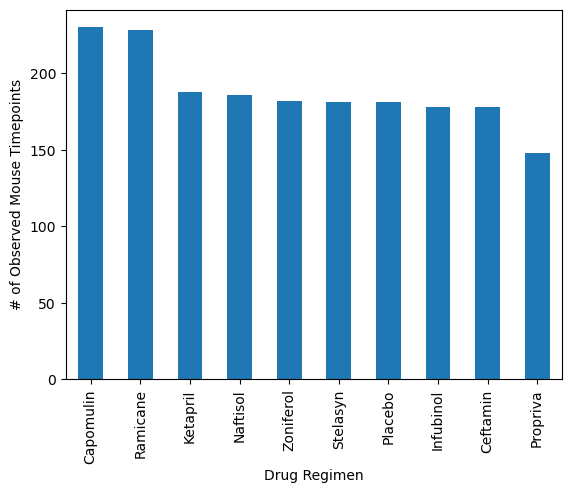

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

panda_bar_plot = clean_study_data['Drug Regimen'].value_counts()
bar_plot = panda_bar_plot.plot(kind = "bar", rot=90)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


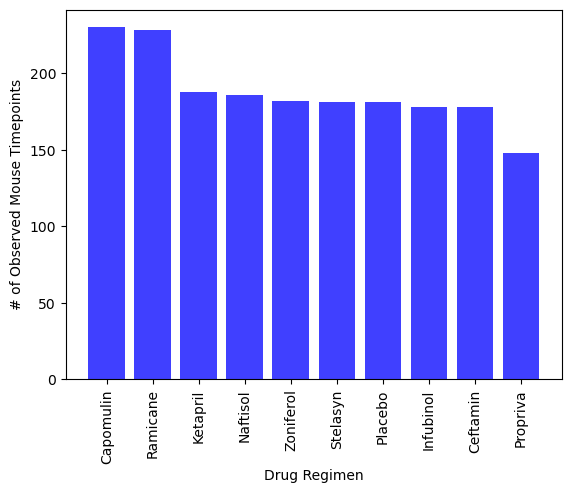

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

bar_df =  pd.DataFrame(panda_bar_plot)
plt.bar(bar_df.index, bar_df["count"], color='b', alpha = 0.75, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

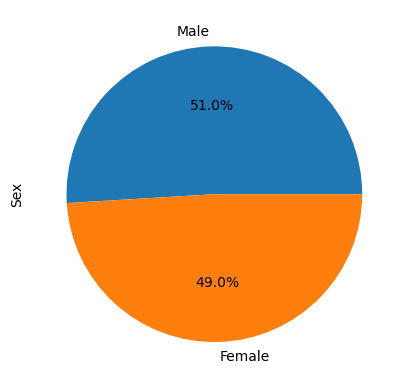

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_study_data["Sex"].value_counts()
mouse_sex_plot = mouse_sex.plot(kind = "pie", autopct="%1.1f%%")
mouse_sex_plot.set_ylabel("Sex")
plt.show()


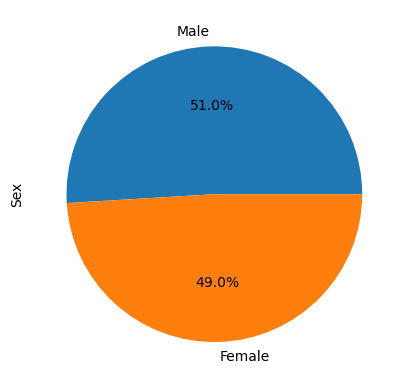

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_sex, labels= mouse_sex.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = pd.DataFrame(clean_study_data.groupby(["Mouse ID"]).max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_timepoint = pd.merge(timepoint, clean_study_data, how ="left", on=["Mouse ID", "Timepoint"])
tumor_vol_timepoint.reset_index()
tumor_vol_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)S
tumor_vol_data = []

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vol = tumor_vol_timepoint.loc[tumor_vol_timepoint["Drug Regimen"] == treatment, ['Tumor Volume (mm3)']]
    
    # add subset 
    tumor_vol_data.append(drug_tumor_vol['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartile1 = np.quantile(drug_tumor_vol, .25)
    quartile3 = np.quantile(drug_tumor_vol, .75)
    iqr = quartile3 - quartile1
    
    lower_bound = quartile1 - (1.5*iqr)
    upper_bound = quartile3 + (1.5*iqr)
    outliers = drug_tumor_vol[(drug_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | 
                         (drug_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]

    print(f'Drug: {treatment} Q1: {quartile1} Q3: {quartile3} IQR: {iqr}')    
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    print(f"Outliers: {outliers['Tumor Volume (mm3)']}\n\n")

Drug: Capomulin Q1: 32.37735684 Q3: 40.1592203 IQR: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be outliers.
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Drug: Ramicane Q1: 31.56046955 Q3: 40.65900627 IQR: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be outliers.
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Drug: Infubinol Q1: 54.04860769 Q3: 65.52574285 IQR: 11.477135160000003
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


Drug: Ceftamin Q1: 48.72207785 Q3: 64.29983003 IQR: 15.577752179999997
Values below 25.355449580000002 and above 87.66645829999999 could be outliers.
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)




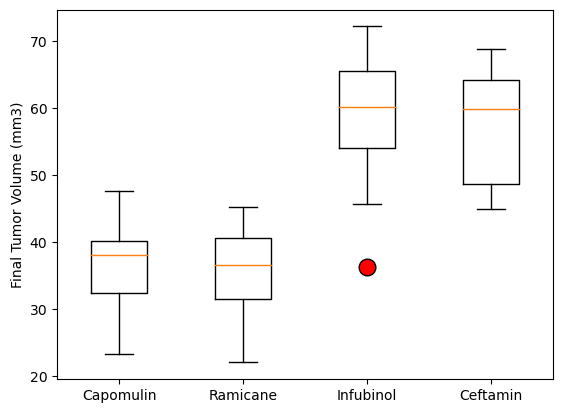

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor ='red', markersize = 12)
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

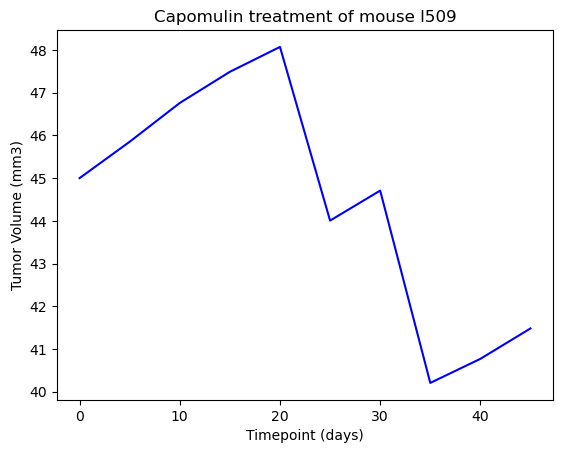

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = pd.DataFrame(clean_study_data.loc[(clean_study_data['Mouse ID'] == "l509") & 
                                                 (clean_study_data["Drug Regimen"] == "Capomulin")])

tumorVolume_timepoint, = plt.plot(line_plot_df["Timepoint"], line_plot_df["Tumor Volume (mm3)"], color="blue", 
                                  label="World Average" )

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()

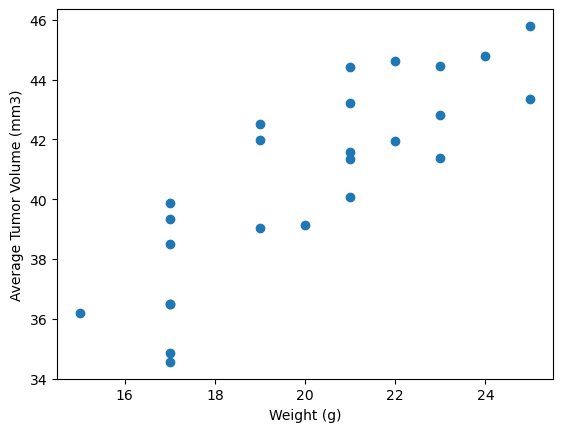

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"].groupby(
    ['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(scatter_df["Weight (g)"], scatter_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


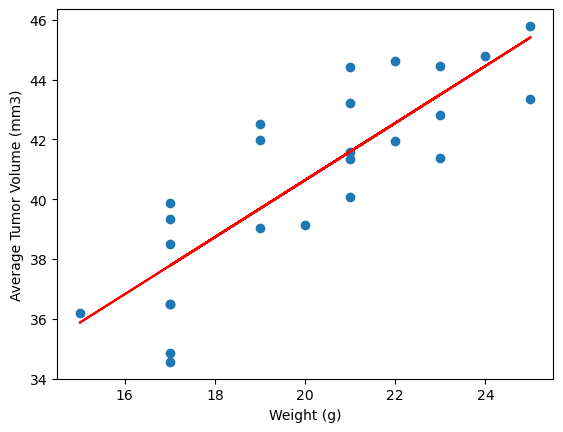

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()